In [317]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [318]:
df=pd.read_csv('D:/ML Industrial Training/Data Files/chennai_house_price_prediction.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [319]:
df.shape

(7109, 19)

## variable identification

In [320]:
df.dtypes


PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [321]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [322]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P09365,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [323]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

## univariate analysis

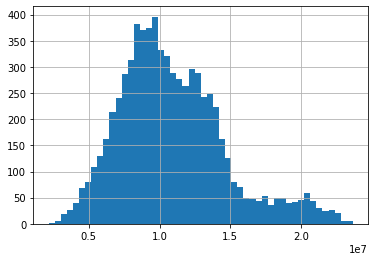

In [324]:
df['SALES_PRICE'].hist(bins=50)

#slightly right skewwed graph meaans price of few houses is very high


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x23DAB4F0>]],
      dtype=object)

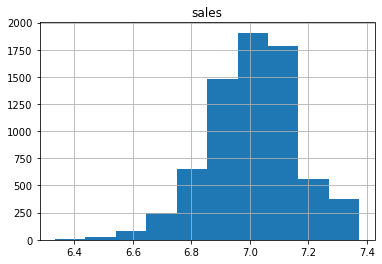

In [325]:
from math import log10
temp = pd.DataFrame(data=df,columns=['sales'])

for i in range(0,len(df["SALES_PRICE"])):
    temp['sales'][i] = log10(df['SALES_PRICE'][i])   
temp.hist(bins=10)

In [326]:
# in this we were trying to add new column in dataframe and then delete it 
df['sales']=temp['sales']
df.head()
df.drop(['sales'],axis=1,inplace=True)

In [327]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


Text(0.5, 0, 'INT_SQFT')

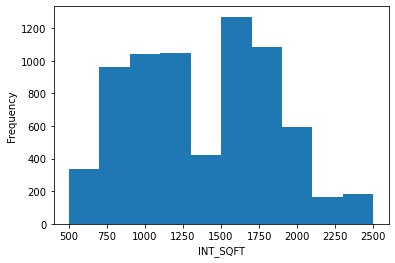

In [328]:
df["INT_SQFT"].plot.hist()
plt.xlabel('INT_SQFT')
#most of the size  are 750-1250 or 1500-200

Text(0.5, 0, 'DISTNACE')

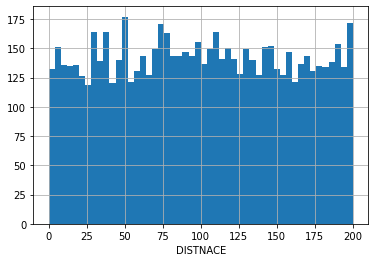

In [329]:
df["DIST_MAINROAD"].hist(bins=50)
plt.xlabel('DISTNACE')

# ditsnace is distributed var has so many vlues with almost same freq

In [330]:
df['N_ROOM'].value_counts()/len(df['N_ROOM'])

4    0.360529
3    0.298917
5    0.175271
2    0.129554
6    0.035729
Name: N_ROOM, dtype: float64

In [331]:
df['N_BEDROOM'].value_counts()/len(df['N_BEDROOM'])

1.0    0.533830
2.0    0.330848
3.0    0.099451
4.0    0.035729
Name: N_BEDROOM, dtype: float64

#### DATA VISUALIZATION OR MISSING VALUE TREEATMENT

In [332]:
# drop duplicates 
df.drop_duplicates()
df.shape

# we have no duplicates 

(7109, 19)

In [333]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [334]:
#check which row of n_BEDroom has missing value  
df[df["N_BEDROOM"].isnull()]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,181,NaN,1.0,4,Partiall,No,House,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,107978,10797790


In [335]:
# we can  see this block has totals 4 rooms and value of bed room is missing
# we will find the mode of all N_ROOMS in houses whuch has 4 rooms and input the mod value  

In [336]:
t=(df["N_BEDROOM"].loc[df['N_ROOM']==4]).mode()


In [337]:
df['N_BEDROOM'][4060]=df['N_BEDROOM'].fillna=2


C:\Users\Gourav khurana\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [338]:
df['N_BEDROOM'][4060]

2.0

In [339]:
#now we will do for n_bathroom

In [340]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [341]:
for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if (df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else: 
            df['N_BATHROOM'][i] = 2.0

C:\Users\Gourav khurana\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Gourav khurana\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [342]:
df['N_BATHROOM'].isnull().sum()

0

In [343]:
df['QS_OVERALL'][6134]

nan

In [344]:
df['QS_OVERALL']=df['QS_OVERALL'].fillna(value=(df['QS_ROOMS']+df['QS_BEDROOM']+df['QS_BATHROOM'])/3)

df['QS_OVERALL'],df.isnull().sum()

(0       4.330
 1       3.765
 2       3.090
 3       4.010
 4       3.290
         ...  
 7104    2.520
 7105    3.920
 7106    3.840
 7107    4.160
 7108    3.640
 Name: QS_OVERALL, Length: 7109, dtype: float64,
 PRT_ID           0
 AREA             0
 INT_SQFT         0
 DIST_MAINROAD    0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 QS_ROOMS         0
 QS_BATHROOM      0
 QS_BEDROOM       0
 QS_OVERALL       0
 COMMIS           0
 SALES_PRICE      0
 dtype: int64)

In [345]:
## all missing values are treated


## making more sense out of data(category)  

In [346]:
df["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

In [347]:
df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)

In [348]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [349]:
df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [350]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)

In [351]:
## BIVARIATE ANALYSIS 

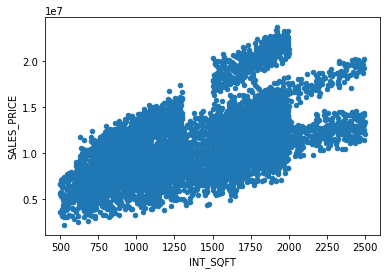

In [352]:
# interior area and sales price (target)

df.plot.scatter('INT_SQFT','SALES_PRICE')

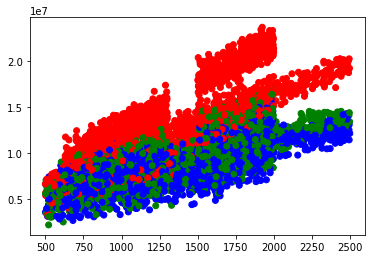

In [353]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c=df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

In [354]:
# sale price of houses wrt number of bedrooms and bathroomms 
df.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168580.0,NaN
2.0,12121915.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


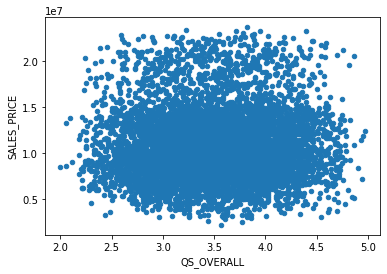

In [355]:
#QS_OVERALL and sales price

df.plot.scatter('QS_OVERALL', 'SALES_PRICE')

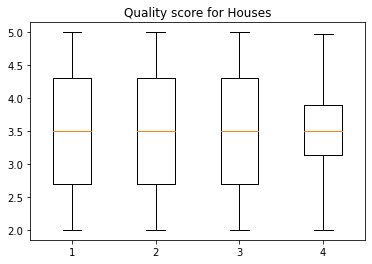

In [356]:
# Create an axes instance
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

# Create the boxplot
bp = ax.boxplot([df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_OVERALL']])

- Distribution of number of houses in each quartile is same for 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM'
- For QS_OVERALL, 50 % of values lie in a very small range of ~3.2 to 3.7 score

In [357]:
# SALE PRICE based on building type

df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

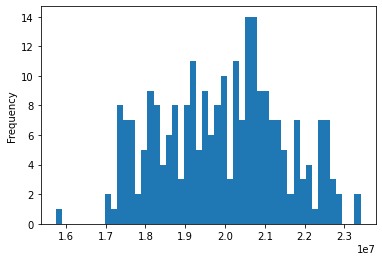

In [358]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

In [359]:
# building type and parking facility
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)
df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

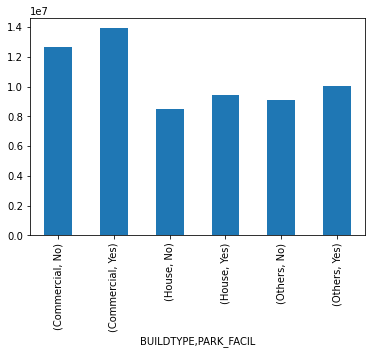

In [360]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar', stacked = True)

In [361]:
# average price for each area category

df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')
temp=pd.DataFrame(index=df['AREA'])

<BarContainer object of 7109 artists>

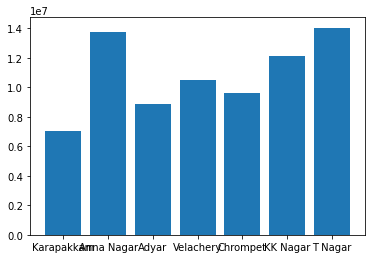

In [362]:
temp['a']=df.groupby(['AREA']).SALES_PRICE.median()
plt.bar(df['AREA'],temp['a'])

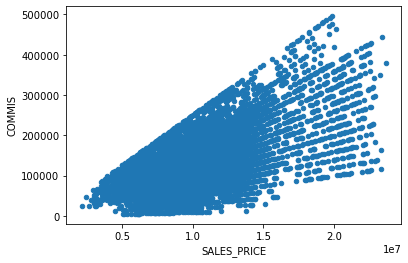

In [363]:
# commission and sales price

df.plot.scatter('SALES_PRICE', 'COMMIS')

In [364]:
df[['SALES_PRICE', 'COMMIS']].corr()
#corelation 

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


# Linear Regression Model

In [365]:
from sklearn.linear_model import LinearRegression 

In [366]:
lr=LinearRegression()
df.drop(['PRT_ID'], axis=1, inplace = True)
df=pd.get_dummies(df)

In [368]:
# separate variables 
x=df.drop(['SALES_PRICE'],axis=1)
y=df["SALES_PRICE"]


In [369]:
##scale data 
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(x,y)

array([[0.252     , 0.655     , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.743     , 0.13      , 0.96666667, ..., 1.        , 0.        ,
        0.        ],
       [0.2045    , 0.35      , 0.7       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.557     , 0.76      , 0.76666667, ..., 0.        , 0.        ,
        0.        ],
       [0.1435    , 0.2       , 0.86666667, ..., 0.        , 1.        ,
        0.        ],
       [0.698     , 0.78      , 0.36666667, ..., 0.        , 0.        ,
        0.        ]])

In [370]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((4976, 48), (2133, 48), (4976,), (2133,))

In [371]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [373]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [375]:
pred_train = lr.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y,pred_train))

In [377]:
pred_test = lr.predict(valid_x)
valid_score=np.sqrt(mean_squared_log_error(valid_y,pred_test))

In [378]:
print('Training score:', train_score)
print('Validation score:', valid_score)

Training score: 0.09097022122980856
Validation score: 0.09459169709537493
